In [35]:
import pandas as pd
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use('seaborn')

In [2]:
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/swiss.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [3]:
#data wrangling: change column names to be readable and typable
df.columns = ['fertility', 'agri', 'exam', 'edu', 'catholic', 'infant_mort']

In [4]:
#this is the model we are going to run
formula = 'fertility ~ %s'%(" + ".join(df.columns.values[1:]))
formula

'fertility ~ agri + exam + edu + catholic + infant_mort'

In [8]:
lin_reg = smf.ols(formula, data=df).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              fertility   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     19.76
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           5.59e-10
Time:                        13:18:45   Log-Likelihood:                -156.04
No. Observations:                  47   AIC:                             324.1
Df Residuals:                      41   BIC:                             335.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      66.9152     10.706      6.250      0.000        45.294    88.536
agri           -0.1721      0.070     -2.448      0.019        -0.314    -0.030
exam           -0.2580      0.254     -1.016      0.315        -0.771     0.255
edu            -0.8709      0.183     -4.758      0.000        -1.241    -0.501
catholic        0.1041      0.035      2.953      0.005         0.033     0.175
infant_mort     1.0770      0.382      2.822      0.007         0.306     1.848
==============================================================================
Omnibus:                        0.058   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.155
Skew:                          -0.077   Prob(JB):                        0.925
Kurtosis:                       2.764   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
lin_reg.params

Intercept      66.915182
agri           -0.172114
exam           -0.258008
edu            -0.870940
catholic        0.104115
infant_mort     1.077048
dtype: float64

In [10]:
lin_reg.conf_int()

,0,1
Intercept,45.293900,88.536463
agri,-0.314096,-0.030132
exam,-0.770726,0.254709
edu,-1.240574,-0.501306
catholic,0.032911,0.175320
infant_mort,0.306150,1.847947


In [11]:
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept      21.621281
agri            0.141982
exam            0.512717
edu             0.369634
catholic        0.071205
infant_mort     0.770898
dtype: float64

In [12]:
coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-0.172114,0.141982,agri
1,-0.258008,0.512717,exam
2,-0.870940,0.369634,edu
3,0.104115,0.071205,catholic
4,1.077048,0.770898,infant_mort


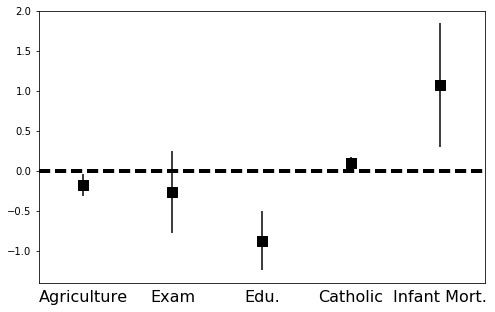

In [13]:
#basic plot
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
                       rotation=0, fontsize=16)

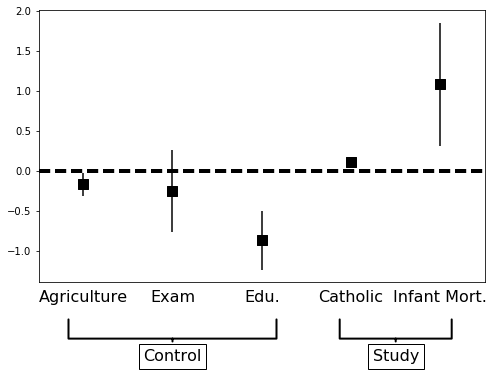

In [15]:
#level 2: adding groups
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
                       rotation=0, fontsize=16)

fs = 16
ax.annotate('Control', xy=(0.3, -0.2), xytext=(0.3, -0.3), 
            xycoords='axes fraction', 
            textcoords='axes fraction', 
            fontsize=fs, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', ec='black'),
            arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=1.2', lw=2.0, color='black'))

_ = ax.annotate('Study', xy=(0.8, -0.2), xytext=(0.8, -0.3), 
                 xycoords='axes fraction', 
                 textcoords='axes fraction', 
                 fontsize=fs, ha='center', va='bottom',
                 bbox=dict(boxstyle='square', fc='white', ec='black'),
                 arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=1.2', lw=2.0, color='black'))

In [14]:
#level 3: multiple models and model comparisons
formula_1 = 'fertility ~ %s'%(" + ".join(df.columns.values[1:-1]))
print(formula_1)
mod_1 = smf.ols(formula_1, data=df).fit()
mod_1.params

fertility ~ agri + exam + edu + catholic


Intercept    91.055424
agri         -0.220646
exam         -0.260582
edu          -0.961612
catholic      0.124418
dtype: float64

In [15]:
formula_2 = 'fertility ~ %s'%(" + ".join(df.columns.values[1:-2].tolist() + ['infant_mort']))
print(formula_2)
mod_2 = smf.ols(formula_2, data=df).fit()
mod_2.params

fertility ~ agri + exam + edu + infant_mort


Intercept      68.773136
agri           -0.129292
exam           -0.687994
edu            -0.619649
infant_mort     1.307097
dtype: float64

In [16]:
coef_df = pd.DataFrame()
for i, mod in enumerate([mod_1, mod_2]):
    err_series = mod.params - mod.conf_int()[0]
    coef_df = coef_df.append(pd.DataFrame({'coef': mod.params.values[1:],
                                           'err': err_series.values[1:],
                                           'varname': err_series.index.values[1:],
                                           'model': 'model %d'%(i+1)
                                          })
                            )
coef_df

,coef,err,model,varname
0,-0.220646,0.148531,model 1,agri
1,-0.260582,0.553176,model 1,exam
2,-0.961612,0.392609,model 1,edu
3,0.124418,0.075207,model 1,catholic
0,-0.129292,0.151049,model 2,agri
1,-0.687994,0.456646,model 2,exam
2,-0.619649,0.355803,model 2,edu
3,1.307097,0.820514,model 2,infant_mort


In [17]:
## marker to use
marker_list = 'so'
width=0.25
## 5 covariates in total
base_x = pd.np.arange(5) - 0.2
base_x

array([-0.2,  0.8,  1.8,  2.8,  3.8])

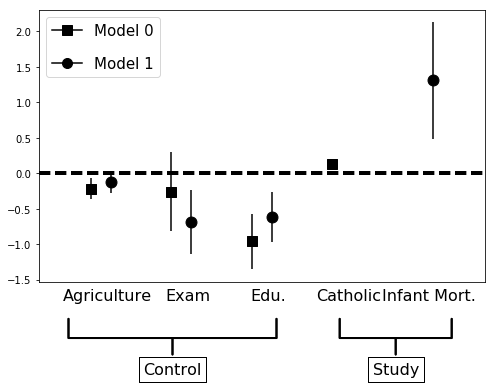

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))
for i, mod in enumerate(coef_df.model.unique()):
    mod_df = coef_df[coef_df.model == mod]
    mod_df = mod_df.set_index('varname').reindex(coef_df['varname'].unique())
    ## offset x posistions
    X = base_x + width*i
    ax.bar(X, mod_df['coef'],  
           color='none',yerr=mod_df['err'])
    ## remove axis labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=X, 
               marker=marker_list[i], s=120, 
               y=mod_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(['', 'Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
                           rotation=0, fontsize=16)

    fs = 16
    ax.annotate('Control', xy=(0.3, -0.2), xytext=(0.3, -0.35), 
                xycoords='axes fraction', 
                textcoords='axes fraction', 
                fontsize=fs, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white', ec='black'),
                arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=1.2', lw=2.0, color='black'))

    ax.annotate('Study', xy=(0.8, -0.2), xytext=(0.8, -0.35), 
                xycoords='axes fraction', 
                textcoords='axes fraction', 
                fontsize=fs, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white', ec='black'),
                arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=1.2', lw=2.0, color='black'))
    
## finally, build customized legend
legend_elements = [Line2D([0], [0], marker=m,
                          label='Model %d'%i,
                          color = 'k',
                          markersize=10)
                   for i, m in enumerate(marker_list)
                  ]
_ = ax.legend(handles=legend_elements, loc=2, 
              prop={'size': 15}, labelspacing=1.2)

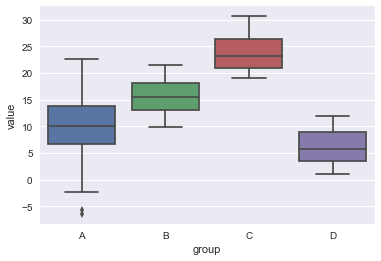

In [21]:
#boxplots and fixing them
 
# fake data:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
sns.boxplot(x='group', y='value', data=df)


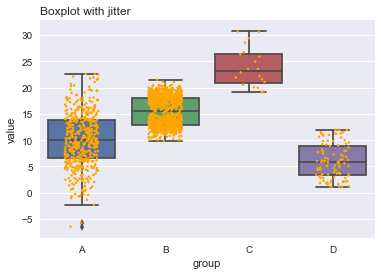

In [22]:
#correction: adding jitter
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")


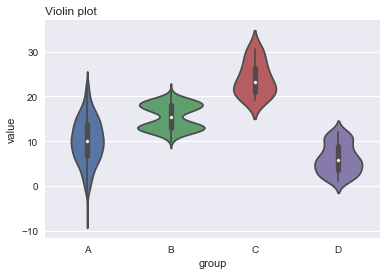

In [23]:
#correction: building violin plots
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")


/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


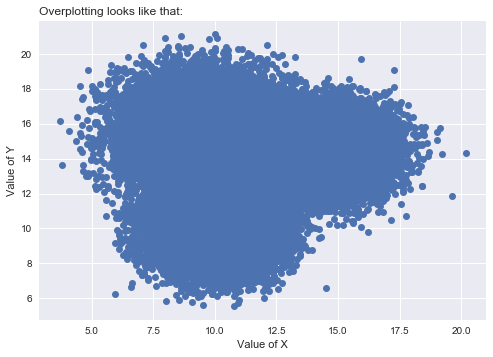

In [42]:
#avoiding clutter and overplotting
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('seaborn')
 
# Dataset:
df=pd.DataFrame({'x': np.random.normal(10, 1.2, 20000), 'y': np.random.normal(10, 1.2, 20000), 'group': np.repeat('A',20000) })
tmp1=pd.DataFrame({'x': np.random.normal(14.5, 1.2, 20000), 'y': np.random.normal(14.5, 1.2, 20000), 'group': np.repeat('B',20000) })
tmp2=pd.DataFrame({'x': np.random.normal(9.5, 1.5, 20000), 'y': np.random.normal(15.5, 1.5, 20000), 'group': np.repeat('C',20000) })
df=df.append(tmp1).append(tmp2)
 
# plot
plt.plot( 'x', 'y', data=df, linestyle='', marker='o')
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting looks like that:', loc='left')




/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


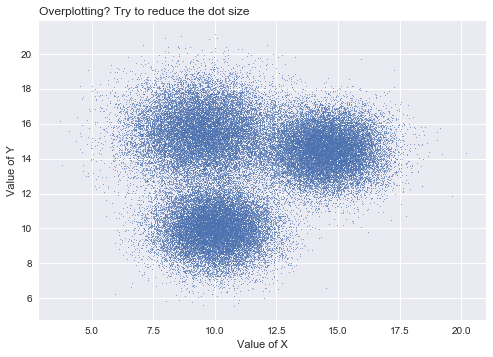

In [43]:
#correction: change dot size
# Plot with small marker size
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')



/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


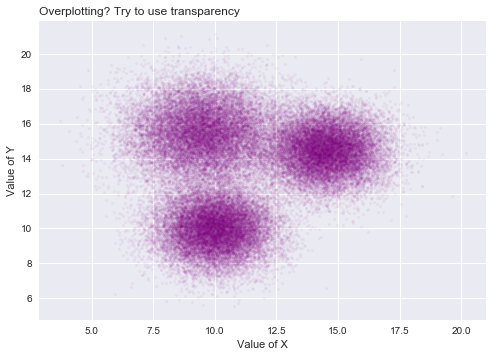

In [44]:
#correction: change transparency
# Plot with transparency
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=3, alpha=0.05, color="purple")
 
# Titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to use transparency', loc='left')


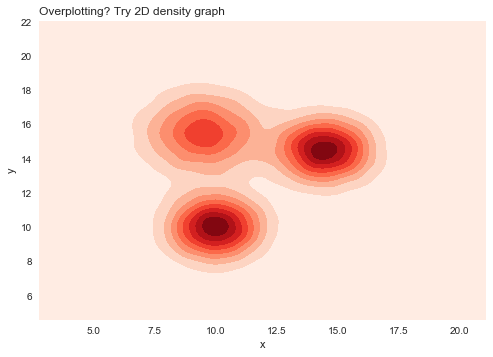

In [46]:
#correction:Adding density
# 2D density plot:
sns.kdeplot(df.x, df.y, cmap="Reds", shade=True)
plt.title('Overplotting? Try 2D density graph', loc='left')



/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3318: RuntimeWarning: Second argument is ambiguous: could be a color spec but is in data. Using as data.
Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


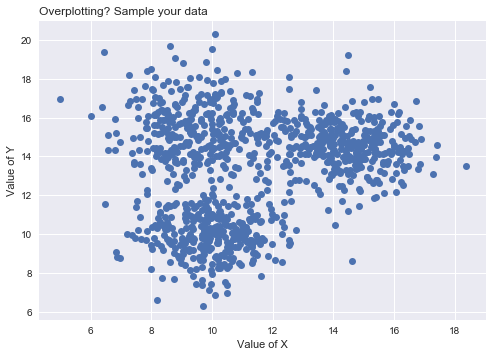

In [37]:
#correction: random sampling
# Sample 1000 random lines
df_sample=df.sample(1000)
 
# Make the plot with this subset
plt.plot( 'x', 'y', data=df_sample, linestyle='', marker='o')
 
# titles
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Sample your data', loc='left')
